In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data/', one_hot=True)
import matplotlib.pyplot as plt
import numpy as np
import random as ran
%matplotlib inline

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
import tensorflow as tf

In [3]:
def TRAIN_SIZE(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test

def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
        
def display_mult_flat(start, stop):
    images = x_train[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()

In [4]:
x_train, y_train = TRAIN_SIZE(55000)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)



[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


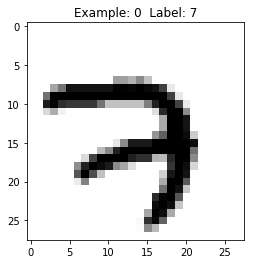

In [5]:
display_digit(0)

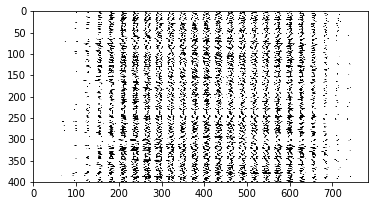

In [6]:
display_mult_flat(0,400)

In [7]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W) + b)
# cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))

In [8]:
x_train, y_train = TRAIN_SIZE(5500)
x_test, y_test = TEST_SIZE(10000)
LEARNING_RATE = 0.05
TRAIN_STEPS = 4000

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (5500, 784)
y_train Examples Loaded = (5500, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (10000, 784)
y_test Examples Loaded = (10000, 10)


In [9]:
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [10]:
for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + '  Loss = ' + str(sess.run(cross_entropy, {x: x_train, y_: y_train})))

Training Step:0  Accuracy =  0.5988  Loss = 2.301993
Training Step:100  Accuracy =  0.4912  Loss = 2.1755114
Training Step:200  Accuracy =  0.549  Loss = 2.0144858
Training Step:300  Accuracy =  0.6553  Loss = 1.9298809
Training Step:400  Accuracy =  0.711  Loss = 1.8717862
Training Step:500  Accuracy =  0.7713  Loss = 1.8237965
Training Step:600  Accuracy =  0.7844  Loss = 1.7916925
Training Step:700  Accuracy =  0.7915  Loss = 1.7696593
Training Step:800  Accuracy =  0.7979  Loss = 1.7534255
Training Step:900  Accuracy =  0.8022  Loss = 1.7408644
Training Step:1000  Accuracy =  0.8065  Loss = 1.7307698
Training Step:1100  Accuracy =  0.8084  Loss = 1.7224004
Training Step:1200  Accuracy =  0.8102  Loss = 1.7152584
Training Step:1300  Accuracy =  0.8118  Loss = 1.7089564
Training Step:1400  Accuracy =  0.8133  Loss = 1.7030792
Training Step:1500  Accuracy =  0.8168  Loss = 1.6968626
Training Step:1600  Accuracy =  0.8259  Loss = 1.6885967
Training Step:1700  Accuracy =  0.8341  Loss =

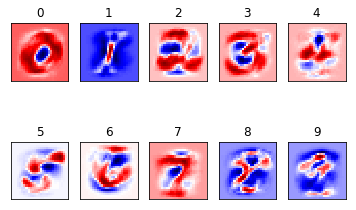

In [11]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(W)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False) 
plt.show()

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (1, 784)
y_train Examples Loaded = (1, 10)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


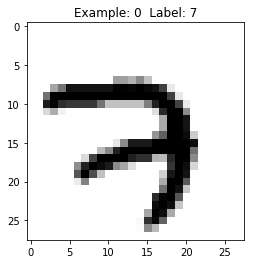

In [12]:
x_train, y_train = TRAIN_SIZE(1) 
display_digit(0)

In [13]:
answer = sess.run(y, feed_dict={x: x_train})
print(answer)

[[2.8205244e-04 1.6619071e-05 6.1329301e-02 4.0495998e-04 3.2230315e-03
  3.1420516e-04 9.2139997e-04 8.7499112e-01 5.6646774e-03 5.2852571e-02]]


In [14]:
answer.argmax()

7

In [15]:
def display_compare(num):
    # THIS WILL LOAD ONE TRAINING EXAMPLE
    x_train = mnist.train.images[num,:].reshape(1,784)
    y_train = mnist.train.labels[num,:]
    
    # THIS GETS OUR LABEL AS A INTEGER
    label = y_train.argmax()
    
    # THIS GETS OUR PREDICATION AS A INTEGER
    prediction = sess.run(y, feed_dict={x: x_train}).argmax() 
    
    plt.title('Prediction: %d Label: %d' % (prediction, label))
    plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()

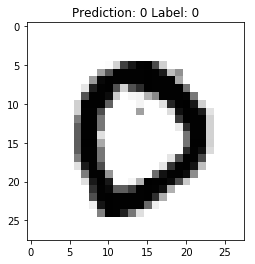

In [16]:
display_compare(ran.randint(0, 55000))